## 实验三：数据的统计与模型分析实验

### 学号：2021104140101；姓名：张三

### 一、实验目的
1. 掌握均匀分布和正态分布、线性相关和线性回归的相关概念，统计量的计算和分布图的绘制。
2. 掌握数据统计分析中常用统计量的计算和随机抽样的方法。
3. 掌握参数的估计、检验和统计推断的可视化方法。
4. 掌握线性相关分析中相关系数的计算和检验。
5. 掌握线性回归模型的建立、检验和预测，以及线性回归的可视化。


### 二、 实验内容
**<font color="#dd0000">注意：要求采用Python编写程序完成相应的统计量计算和分析，对结果尽量采用图形可视化的方式进行展示，可参考教材中相关例子中定义的函数。</font>**

In [25]:
#结果多项输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

**题目1（15分）：** 从某厂生产的一批铆钉中随机抽取10个，测得其直径分别为13.35,13.38, 13.40, 13.43, 13.32, 13.48, 13.34, 13. 47, 13.44, 13.50。试求铆钉头部直径这一总体的均值μ 与标准差σ的估计。

In [26]:
# 题目1
import math

data = [13.35, 13.38, 13.40, 13.43, 13.32, 13.48, 13.34, 13.47, 13.44, 13.50]
n = len(data)
mean = sum(data) / n
std_dev = np.std(data,ddof=1)

print("样本均值为:", round(mean, 2))
print("样本标准差为:", round(std_dev, 2))

样本均值为: 13.41
样本标准差为: 0.06


**题目2（15分）：** 某送信服务公司登出广告，声称其本地信件传送时间不长于6小时，随机抽样其 传送一包裹到一指定地址所花时间，数据为7.2，3.5，4.3，6.2，l0.1，5.4，6.8，4.5， 5.1，6.6，3.8和8.2小时，求平均传送时间的95％置信度的置信区间。

In [27]:
# 题目2
import math
from scipy.stats import t
import math

data = [7.2, 3.5, 4.3, 6.2, 10.1, 5.4, 6.8, 4.5, 5.1, 6.6, 3.8, 8.2]
n = len(data)
mean = sum(data) / n
std_dev =  np.std(data,ddof=1)
print("置信区间为: [{:.2f}, {:.2f}]".format(mean-1.96*std_dev/math.sqrt(n),mean+1.96*std_dev/math.sqrt(n)))

置信区间为: [4.88, 7.07]


**题目3（20分）：** 一家制造商生产钢棒，为了提高质量，如果某新的生产工艺生产出的钢棒的断裂 强度大于现有平均断裂强度标准，公司将采用该工艺。当前钢棒的平均断裂强度 标准是500千克，对新工艺生产的钢棒进行抽样检验，12件棒材的断裂强度如下： 502，496，510，508，506，498，512，497，515，503，510和506千克，假设断裂强度的分布比较近似于正态分布，问新工艺是否提高了平均断裂强度?

In [30]:
# 题目3
import numpy as np
from scipy.stats import t

# 样本数据
data = np.array([502, 496, 510, 508, 506, 498, 512, 497, 515, 503, 510, 506])

# 假设的总体均值
mu0 = 500

# 样本均值和标准差
x_bar = np.mean(data)
s = np.std(data, ddof=1)

# 样本大小
n = len(data)

# 计算 t 统计量
t_value = (x_bar - mu0) / (s / np.sqrt(n))

# 自由度
df = n - 1

# 计算 p 值
p_value = 1 - t.cdf(t_value, df=df)

print("样本均值：", x_bar)
print("样本标准差：", s)
print("t 统计量：", t_value)
print("p 值：", p_value)
if p_value<0.05:
    print("新工艺提高了平均断裂强度")
else:
    print("新工艺没提高了平均断裂强度")

样本均值： 505.25
样本标准差： 6.151496491985434
t 统计量： 2.9564405186880625
p 值： 0.006529067891362872
新工艺提高了平均断裂强度


**题目4（25分）：** 文件“iris.csv”数据集中记录了鸢尾花的萼片（Sepal）、花瓣（Petal）的长度和宽度数据，针对该数据中分别针对萼片的长度（Sepal.Length）和宽度（Sepal.Width）、花瓣的长度（Petal.Length）和宽度（Petal.Width）完成以下相关性和回归分析。  
（1）做萼片的长度和宽度的散点图，并以此判断萼片的长度和宽度之间是否大致呈线性相关关系；  
（2）计算萼片的长度和宽度的相关系数并做假设检验；  
（3）对萼片的长度和宽度做OLS回归分析，对回归分析结果进行可视化显示，并给出常用统计量；  
（4）做花瓣的长度和宽度的散点图，并以此判断花瓣的长度和宽度之间是否大致呈线性相关关系；  
（5）计算花瓣的长度和宽度的相关系数并做假设检验；  
（6）对花瓣的长度和宽度做OLS回归分析，对回归分析结果进行可视化显示，并给出常用统计量。

**题目5（25分）：** 由专业知识可知，合金的强度 y（10<sup>7</sup>Pa）与合金中碳的含量x（%）有关。为了生产出强度满足顾客需要的合金，在冶炼时应该如何控制碳的含量？如果在冶炼过程中通过化验得知了碳的含量，能否预测这炉合金的强度？  
x：0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.20, 0.21, 0.23  
y：42, 43.5, 45, 45.5, 45, 47.5, 49, 53, 50, 55, 55, 60  
针对这组数据完成以下相关性和回归分析：  
（1）做x与y的散点图，并以此判断x与y之间是否大致呈线性相关关系；  
（2）计算x与y的相关系数并做假设检验；  
（3）做y对x的最小二乘回归分析，对回归分析结果进行可视化显示，并给出常用统计量；  
（4）估计当x=0.22时，y等于多少；预测当x=0.25时，y等于多少。

<Axes: xlabel='Sepal.Length', ylabel='Sepal.Width'>

Text(0.5, 1.0, 'Scatter plot of Sepal Length vs. Width')

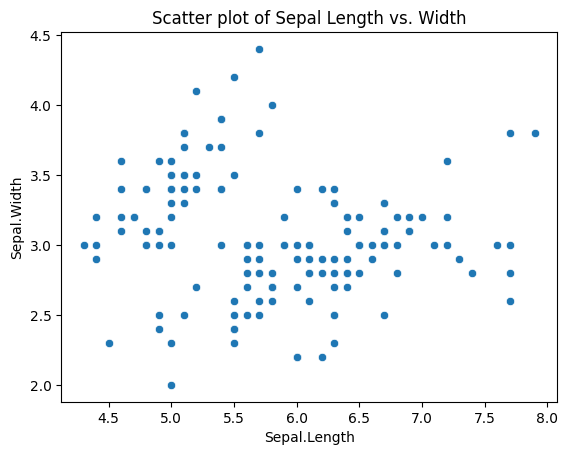

In [33]:
# 题目4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 读取数据集
iris = pd.read_csv('iris.csv')

# 1. 萼片长度和宽度的散点图
sns.scatterplot(data=iris, x='Sepal.Length', y='Sepal.Width')
plt.title('Scatter plot of Sepal Length vs. Width')
plt.show()

In [34]:
# 2. 萼片长度和宽度的相关系数和假设检验
corr, pval = stats.pearsonr(iris['Sepal.Length'], iris['Sepal.Width'])
print(f'Correlation coefficient: {corr:.3f}, p-value: {pval:.3f}')


Correlation coefficient: -0.118, p-value: 0.152


                            OLS Regression Results                            
Dep. Variable:           Sepal.Length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.152
Time:                        15:06:45   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.5262      0.479     13.628      

<Axes: xlabel='Sepal.Width', ylabel='Sepal.Length'>

<Axes: xlabel='Sepal.Width', ylabel='Sepal.Length'>

Text(0.5, 1.0, 'OLS Regression of Sepal Length on Width')

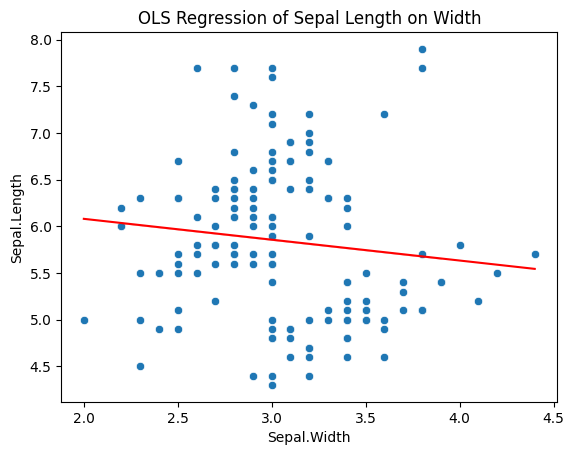

In [35]:
# 3. 萼片长度和宽度的OLS回归分析
X = sm.add_constant(iris['Sepal.Width'])
y = iris['Sepal.Length']
model = sm.OLS(y, X).fit()
print(model.summary())
# 可视化回归分析结果
sns.scatterplot(data=iris, x='Sepal.Width', y='Sepal.Length')
sns.lineplot(x=iris['Sepal.Width'], y=model.predict(), color='red')
plt.title('OLS Regression of Sepal Length on Width')
plt.show()

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

Text(0.5, 1.0, 'Scatter plot of Petal Length vs. Width')

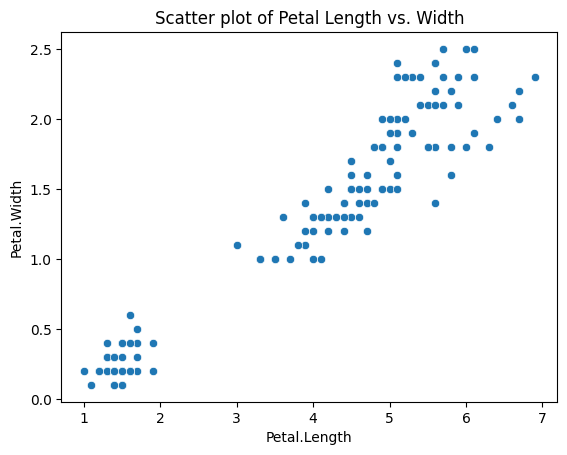

In [36]:
# 4. 花瓣长度和宽度的散点图
sns.scatterplot(data=iris, x='Petal.Length', y='Petal.Width')
plt.title('Scatter plot of Petal Length vs. Width')
plt.show()

In [37]:
# 5. 花瓣长度和宽度的相关系数和假设检验
corr, pval = stats.pearsonr(iris['Petal.Length'], iris['Petal.Width'])
print(f'Correlation coefficient: {corr:.3f}, p-value: {pval:.3f}')

Correlation coefficient: 0.963, p-value: 0.000


                            OLS Regression Results                            
Dep. Variable:           Petal.Length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.68e-86
Time:                        15:06:49   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0836      0.073     14.850      

<Axes: xlabel='Petal.Width', ylabel='Petal.Length'>

<Axes: xlabel='Petal.Width', ylabel='Petal.Length'>

Text(0.5, 1.0, 'OLS Regression of Petal Length on Width')

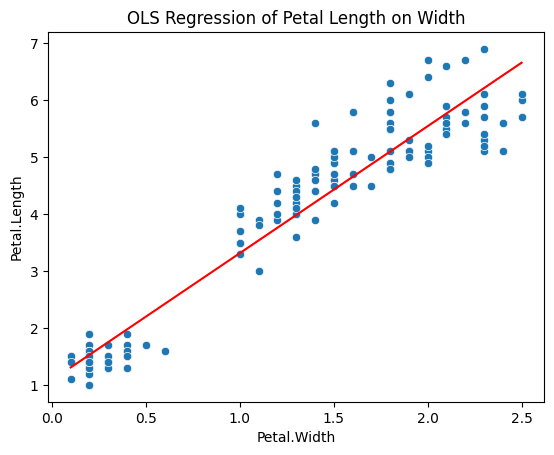

In [38]:
# 6. 花瓣长度和宽度的OLS回归分析
X = sm.add_constant(iris['Petal.Width'])
y = iris['Petal.Length']
model = sm.OLS(y, X).fit()
print(model.summary())

# 可视化回归分析结果
sns.scatterplot(data=iris, x='Petal.Width', y='Petal.Length')
sns.lineplot(x=iris['Petal.Width'], y=model.predict(), color='red')
plt.title('OLS Regression of Petal Length on Width')
plt.show()

Text(0.5, 0, 'Carbon Content (%)')

Text(0, 0.5, 'Strength (10^7Pa)')

Text(0.5, 1.0, 'Scatter Plot of Carbon Content and Strength')

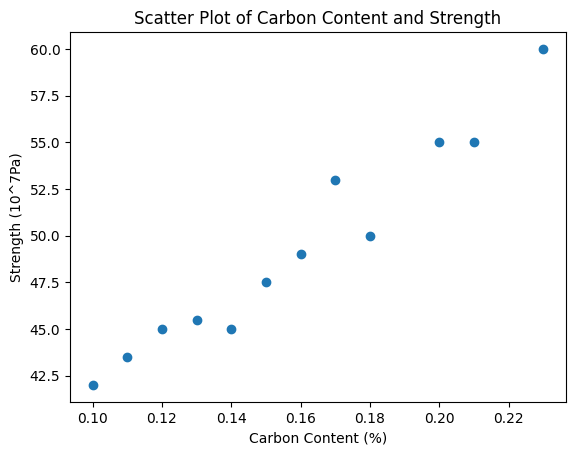

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t

# 输入数据
x = np.array([0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.20, 0.21, 0.23])
y = np.array([42, 43.5, 45, 45.5, 45, 47.5, 49, 53, 50, 55, 55, 60])

# (1) 做x与y的散点图
plt.scatter(x, y)
plt.xlabel('Carbon Content (%)')
plt.ylabel('Strength (10^7Pa)')
plt.title('Scatter Plot of Carbon Content and Strength')
plt.show()

In [45]:
# (2) 计算x与y的相关系数并做假设检验
r, p_value = stats.pearsonr(x, y)
print(f"Correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print(f"Reject null hypothesis, there is significant linear correlation between x and y")
else:
    print(f"Fail to reject null hypothesis, there is no significant linear correlation between x and y")

Correlation coefficient: 0.9737
P-value: 0.0000
Reject null hypothesis, there is significant linear correlation between x and y


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           9.50e-08
Time:                        15:12:31   Log-Likelihood:                -19.260
No. Observations:                  12   AIC:                             42.52
Df Residuals:                      10   BIC:                             43.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4928      1.580     18.036      0.0

d:\python\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 0, 'Carbon Content (%)')

Text(0, 0.5, 'Strength (10^7Pa)')

Text(0.5, 1.0, 'Regression Analysis of Carbon Content and Strength')

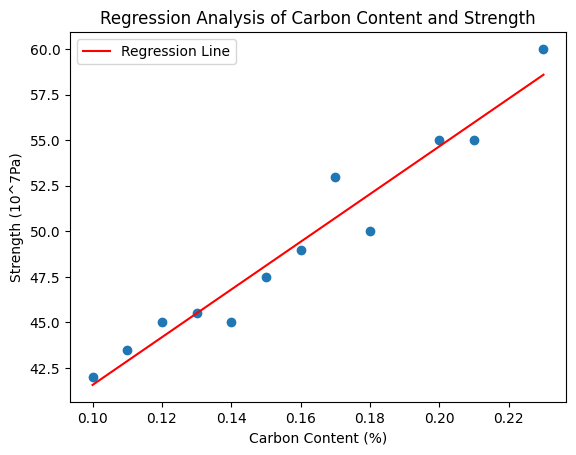

In [46]:
# (3) 做y对x的最小二乘回归分析
x_ = sm.add_constant(x)
model = sm.OLS(y, x_)
result = model.fit()
print(result.summary())

# 绘制回归线和预测值
plt.scatter(x, y)
plt.plot(x, result.predict(x_), 'r', label='Regression Line')
plt.xlabel('Carbon Content (%)')
plt.ylabel('Strength (10^7Pa)')
plt.title('Regression Analysis of Carbon Content and Strength')
plt.legend()
plt.show()

In [47]:
# (4) 估计当x=0.22时，y等于多少
x_pred = np.array([1, 0.22])
y_pred = result.predict(x_pred)
print(f"When x=0.22, y is estimated to be {y_pred[0]:.2f}")

When x=0.22, y is estimated to be 57.28


### 实验总结与心得体会

通过本次实验我主要学习了统计分析和回归分析相关的概念和方法，并且通过Python实现了相关的代码操作。实验中，我学习了如何进行假设检验和置信区间估计，以及如何通过回归分析进行变量之间关系的探究和预测。同时，我也通过实际的数据案例应用了这些方法和技能，更好地理解了其实际应用的价值和作用。在实验过程中，我收获了许多有益的经验和体会。首先，数据分析和建模不是简单地运用公式和算法，更多的是考验分析者的深入思考和判断能力。例如，在数据分析过程中，需要合理地选择和处理数据，以避免数据的缺失和异常对结果造成的影响。其次，统计分析和回归分析需要结合实际问题进行思考和解决，只有把握好实际背景和目标，才能有效地提取变量之间的关系和进行预测分析。最后，Python是一种非常实用的数据分析工具，具有方便快捷、高效准确等特点，对于进行数据处理和分析有很大的帮助。

### 实验成绩：

________________________________